STEP 1:DATA PREPROCESSING / DATA CLEANING   





Importing Sales Dataset and Performing Basic EDA

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_1000.xlsx")
df_sales=df
df.head()
df_sales.head()
df_sales.isnull()
df_sales.isnull().sum()
df_sales.describe()
df_sales.columns
df_sales.info()
df_sales.shape
df_sales.isnull()
df_sales.isnull().sum()
df_sales.duplicated().sum()
df_sales.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   Transaction_ID       1000 non-null   object 
 2   Date                 1000 non-null   object 
 3   Customer_ID          1000 non-null   object 
 4   Age                  1000 non-null   int64  
 5   Gender               1000 non-null   object 
 6   Income               1000 non-null   int64  
 7   Loyalty_Score        1000 non-null   int64  
 8   Signup_Date          1000 non-null   object 
 9   Product_ID           1000 non-null   object 
 10  Category             1000 non-null   object 
 11  City                 1000 non-null   object 
 12  Channel              1000 non-null   object 
 13  Payment_Method       1000 non-null   object 
 14  Device               1000 non-null   object 
 15  Price                1000 non-null   fl

 1. REPLACE MISSING VALUES OR NULL VALUES WITH 0:

In [8]:

import pandas as pd
import numpy as np
df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx")
df_sales=df

# Replace all null or missing values with 0
df.fillna(0, inplace=True)

# Verify if all missing values are replaced
print("Remaining missing values:", df.isnull().sum().sum())



Remaining missing values: 0


2. ADDING AND REMOVING DUPLICATES:

In [9]:
import pandas as pd
import numpy as np
import os
import random

# Load dataset
df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx")

# Step 1: Add random duplicates (for example, 10 random rows)
num_duplicates = 10
duplicates = df_sales.sample(num_duplicates, random_state=42)
df_with_dupes = pd.concat([df_sales, duplicates], ignore_index=True)

# Step 2: Remove the same number of duplicates
df_final = df_with_dupes.drop_duplicates(keep='first')
# Step 3: Export the final file (same as original) to a random path

export_path =("Sales_Project_output2.xlsx")

df_final.to_excel(export_path, index=False)

print(f"✅ File exported successfully at: {export_path}")



✅ File exported successfully at: Sales_Project_output2.xlsx


3. DETECTING OUTLIERS USING IQR METHOD AND REMOVING OUTLIERS:


In [10]:
import pandas as pd
import numpy as np
import random

# Load dataset
df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx")

# Step 1: Select only numeric columns
numeric_cols = df_sales.select_dtypes(include=np.number).columns

# Step 2: Detect outliers using IQR method
outlier_indices = set()

for col in numeric_cols:
    Q1 = df_sales[col].quantile(0.25)
    Q3 = df_sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outlier row indices for this column
    col_outliers = df_sales[
        (df_sales[col] < lower_bound) | (df_sales[col] > upper_bound)
        ].index
    outlier_indices.update(col_outliers)

print(f"Total outliers detected: {len(outlier_indices)}")

# Step 3: Remove those outlier rows
df_no_outliers = df_sales.drop(index=outlier_indices)

print(f"Shape before removing outliers: {df_sales.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

# Step 4: Export cleaned dataset
export_path =("Sales_Project_output3_Cleaned_NoOutliers.xlsx")
df_no_outliers.to_excel(export_path, index=False)

print(f"✅ Cleaned file exported successfully at: {export_path}")



Total outliers detected: 374
Shape before removing outliers: (1000, 40)
Shape after removing outliers: (626, 40)
✅ Cleaned file exported successfully at: Sales_Project_output3_Cleaned_NoOutliers.xlsx


STAGE 1: UNDERSTAND AND GROUP CUSTOMERS

4. CLUSTERING BASED ON CUSTOMER SEGMENTATION:

               Income  Loyalty_Score   CLV_proxy
Cluster                                         
0        35832.442804       4.955720  226.482214
1        46657.109756       1.997967  158.054472
2        70237.919831       5.303797  422.386034


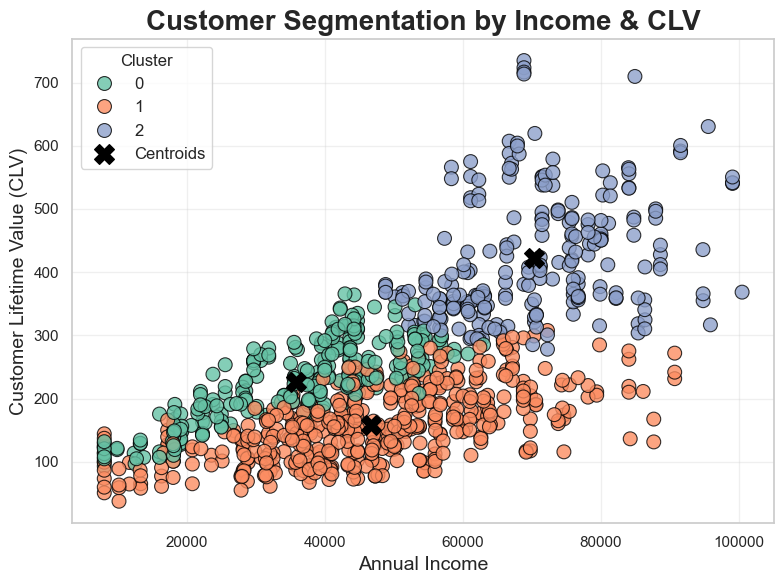

Number of Customers in Each Segment:
Customer_Type
Average Customers                          492
Premium Loyal Customers                    271
Low-Income or Price-Sensitive Customers    237
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx")

# Select features
X = df_sales[['Income', 'Loyalty_Score', 'Frequency_12m', 'Recency_Days', 'CLV_proxy']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_sales['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster summary
cluster_summary = df_sales.groupby('Cluster')[['Income', 'Loyalty_Score', 'CLV_proxy']].mean()
print(cluster_summary)

#Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_sales,
    x='Income', y='CLV_proxy', hue='Cluster',
    palette='Set2', s=100, alpha=0.8, edgecolor='black'
)
# --- Compute Cluster Centroids (in original scale) ---
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# Create a DataFrame for centroids
centroids = pd.DataFrame(centers_original, columns=['Income', 'Loyalty_Score', 'Frequency_12m', 'Recency_Days', 'CLV_proxy'])

# Add centroid markers (big black 'X')
plt.scatter(
    centroids['Income'], centroids['CLV_proxy'],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title('Customer Segmentation by Income & CLV', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Customer Lifetime Value (CLV)', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
# Map clusters to readable names based on their behavior

cluster_labels = {
    0: 'Premium Loyal Customers',
    1: 'Average Customers',
    2: 'Low-Income or Price-Sensitive Customers'
}


# Assign the labels
df_sales['Customer_Type'] = df_sales['Cluster'].map(cluster_labels)

# Check distribution
print("Number of Customers in Each Segment:")
print(df_sales['Customer_Type'].value_counts())

# Insights:

# Cluster 0- low income customer
# Cluster 1- average customer
# Cluster 2- high income customers

# 🧠 Business Value:

# This clustering helps the company to:
# Personalize discount or marketing campaigns per group
# Focus retention efforts on high-value customers
# Allocate marketing budgets more effectively
# Build the foundation for an AI-driven discount recommendation system (in the next stage using Q-Learning)

# ✅ Conclusion

# By applying K-Means Clustering, customers were successfully segmented into distinct groups based on income, loyalty, and purchasing patterns.
# These insights will guide targeted discount strategies and improve customer lifetime value (CLV) across different segments.


STAGE 2: ANALYSE HOW DISCOUNT AFFECTS SALES

    

5.COMPARING ACTUAL VS PREDICTED REVENUE USING LINEAR REGRESSION

Model Evaluation:
R-squared Score: 0.9999999999462553
Mean Squared Error: 2.5338474020573822e-06

 Feature Importance:
            Feature   Coefficient
5       Net_Revenue  6.666685e-01
4               GMV  3.333316e-01
0  Discount_Percent  3.822779e-05
6     Profit_Margin  7.238710e-06
3        Units_Sold  6.732698e-06
2             Price  1.917971e-07
7            Income -7.139516e-10
8     Loyalty_Score -3.902853e-05
1   Discount_Amount -3.333368e-01


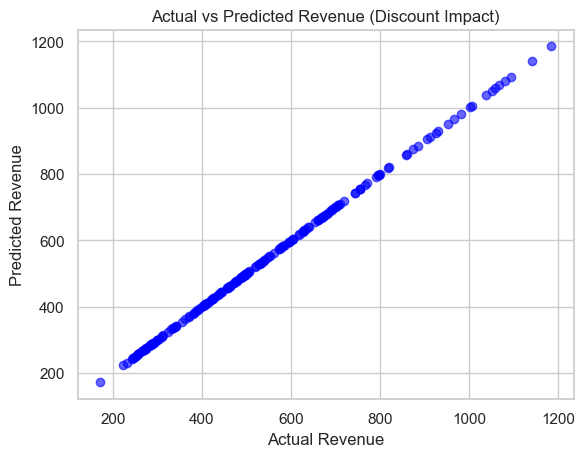

In [12]:
#  Analyze How Discounts Affect Sales

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx")

# Select relevant features for discount vs sales analysis
features = [
    'Discount_Percent', 'Discount_Amount', 'Price','Units_Sold',
    'GMV', 'Net_Revenue', 'Profit_Margin', 'Income', 'Loyalty_Score'
]
target = 'Revenue'

#Prepare data
X = df_sales[features].fillna(0)
y = df_sales[target].fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Model Evaluation:")
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Check feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n Feature Importance:")
print(coef_df)

# Step 10: Visualize actual vs predicted revenue
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Discount Impact)")
plt.show()





STAGE 3: LEARN AND RECOMMEND BEST DISCOUNT STRATEGY

6.FINDING BEST DISCOUNT USING LIGHTGBM

In [13]:
# 1....sales_optimize_units.py
import os, warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from lightgbm import LGBMRegressor



# ---------- CONFIG ----------
# Load dataset
DATA_PATH = "E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx"
df = pd.read_excel(DATA_PATH)
OUT_DIR = "./sales_units_outputsPB"
FIG_DIR = os.path.join(OUT_DIR, "figs")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)

RANDOM_STATE = 42
ACTIONS = [0, 2, 5, 10, 15, 20, 25, 30]   # discount grid to evaluate

np.random.seed(RANDOM_STATE)

# ---------- LOAD & PREP ----------
print("Loading data from:", DATA_PATH)
df = pd.read_excel(DATA_PATH)
print("Raw data shape:", df.shape)

# auto-detect common columns
lower = {c.lower(): c for c in df.columns}
def find(cands):
    for c in cands:
        if c and c.lower() in lower:
            return lower[c.lower()]
    return None

col_qty = find(["units_sold","quantity","qty","units","Units_Sold"])
col_price = find(["price","unit_price","selling_price","Price"])
col_rev = find(["revenue","sales","total","amount","gmv","Revenue"])
col_disc = find(["discount","discount_pct","discount_percent","Discount_Percent"])

# Ensure Units_Sold exists
if col_qty is None:
    print("Units column not found. Creating Units_Sold=1 for each row.")
    df["Units_Sold"] = 1
    col_qty = "Units_Sold"
else:
    df[col_qty] = pd.to_numeric(df[col_qty], errors="coerce")

# Price & Revenue normalization
if col_price is None and col_rev is not None:
    df["Price"] = pd.to_numeric(df[col_rev], errors="coerce") / df[col_qty].replace(0,1)
    col_price = "Price"
elif col_price is not None:
    df["Price"] = pd.to_numeric(df[col_price], errors="coerce")
else:
    df["Price"] = 0.0
    col_price = "Price"

if col_rev is None:
    df["Revenue"] = df["Price"] * df[col_qty].replace(0,1)
else:
    df["Revenue"] = pd.to_numeric(df[col_rev], errors="coerce")

# Discount normalization
if col_disc is None:
    df["discount_pct"] = 0.0
else:
    df["discount_pct"] = pd.to_numeric(df[col_disc], errors="coerce").fillna(0)
    if df["discount_pct"].max() <= 1.01:
        df["discount_pct"] = df["discount_pct"] * 100.0

# drop rows without revenue or units (essential)
df = df.dropna(subset=["Revenue", col_qty]).reset_index(drop=True)
df["Units_Sold"] = pd.to_numeric(df[col_qty], errors="coerce").fillna(0)

# ---------- Stage 1: EDA ----------
print("\n==== Stage 1: Load + Clean + EDA ====")
summary = df[["Price","Units_Sold","Revenue","discount_pct"]].describe().transpose().round(6)
wanted = ["Price","Units_Sold","Revenue","discount_pct"]
available = [r for r in wanted if r in summary.index]
print(summary.loc[available, ["count","mean","std","min","25%","50%","75%","max"]])

summary.loc[available].to_csv(os.path.join(OUT_DIR,"numeric_summary.csv"))

# ---------- Stage 2: Demand Clustering ----------
print("\n==== Stage 2: KMeans Demand Clustering (on Revenue) ====")
rev_vals = df[["Revenue"]].fillna(0).values
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=20)
df["cluster"] = kmeans.fit_predict(rev_vals)
centers = kmeans.cluster_centers_.flatten()
sorted_pairs = sorted(list(enumerate(centers)), key=lambda x: x[1])
cluster_rank = {pair[0]: i for i,pair in enumerate(sorted_pairs)}
df["demand_state"] = df["cluster"].map(cluster_rank).astype(int)
state_name = {0:"Low", 1:"Medium", 2:"High"}

counts = df["demand_state"].value_counts().sort_index()
print("\nDemand State Counts:")
print(counts.to_string())
df[["cluster","demand_state"]].to_csv(os.path.join(OUT_DIR,"demand_clusters.csv"), index=False)

# simple plot
plt.figure(figsize=(7,3))
sns.boxplot(x="demand_state", y="Revenue", data=df)
plt.title("Revenue by demand state")
plt.savefig(os.path.join(FIG_DIR,"revenue_by_state_box.png"), bbox_inches="tight")
plt.close()

# ---------- Stage 3: Train units-sold predictive model ----------
print("\n==== Stage 3: Train Units-Sold Model (LightGBM) ====")
features = ["discount_pct","Price","demand_state"]
# optional product frequency if exists
prod_col = find(["product_id","product","sku","Product_ID","Product"])
if prod_col and prod_col in df.columns:
    df["_product_freq"] = df[prod_col].map(df[prod_col].value_counts()).fillna(0)
    features.append("_product_freq")

X = df[features].fillna(0)
y = df["Units_Sold"].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=RANDOM_STATE)
model = LGBMRegressor(n_estimators=500, learning_rate=0.03, num_leaves=32, random_state=RANDOM_STATE, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Units model R2:", round(r2_score(y_test, y_pred),3), "MAE:", round(mean_absolute_error(y_test, y_pred),3))

# Save model predictions baseline
df["pred_units_baseline"] = model.predict(df[features].fillna(0))
df["pred_revenue_baseline"] = df["pred_units_baseline"] * df["Price"] * (1 - df["discount_pct"]/100.0)

# ---------- Evaluate discount grid per cluster (maximize Units_Sold) ----------
print("\nEvaluating discount grid per demand state (objective = Units_Sold)...")
rows = []
for s in sorted(df["demand_state"].unique()):
    sample = df[df["demand_state"]==s].sample(n=min(500, len(df[df["demand_state"]==s])), replace=True, random_state=RANDOM_STATE)
    for d in ACTIONS:
        Xg = sample[features].copy()
        Xg["discount_pct"] = d
        pred_units = model.predict(Xg)
        rows.append({"state": s, "discount": d, "mean_pred_units": float(pred_units.mean())})
pred_df = pd.DataFrame(rows)
pred_df.to_csv(os.path.join(OUT_DIR,"grid_units_predictions.csv"), index=False)

# choose best discount per state based on predicted units
best_units_df = pred_df.loc[pred_df.groupby("state")["mean_pred_units"].idxmax()].reset_index(drop=True)
best_units_df["state_name"] = best_units_df["state"].map(state_name)
best_units_df = best_units_df[["state","state_name","discount","mean_pred_units"]].copy()
best_units_df["mean_pred_units"] = best_units_df["mean_pred_units"].round(3)
print("\nBest discount per demand state (maximize predicted Units_Sold):")
print(best_units_df.to_string(index=False))
best_units_df.to_csv(os.path.join(OUT_DIR,"best_discount_by_units.csv"), index=False)

# ---------- Compare with user policy (Low=5, Med=0, High=10) ----------
user_policy = {0:5, 1:0, 2:10}
def eval_policy_units(policy_map):
    temp = df.copy()
    temp["discount_pct"] = temp["demand_state"].map(policy_map)
    pred_units = model.predict(temp[features].fillna(0))
    total_units = float(pred_units.sum())
    return total_units

ml_policy_map = {int(r["state"]): int(r["discount"]) for _,r in best_units_df.iterrows()}
ml_units = eval_policy_units(ml_policy_map)
user_units = eval_policy_units(user_policy)
baseline_units = df["pred_units_baseline"].sum()

print(f"\nPredicted total units (baseline): {baseline_units:.1f}")
print(f"Predicted total units (ML policy): {ml_units:.1f}  (policy: {ml_policy_map})")
print(f"Predicted total units (User policy Low=5,Med=0,High=10): {user_units:.1f}  (policy: {user_policy})")

# Save a small comparison table
comp = pd.DataFrame({
    "policy":["baseline","ml_policy","user_policy"],
    "policy_map":[str({"baseline": "current"}), str(ml_policy_map), str(user_policy)],
    "pred_total_units":[baseline_units, ml_units, user_units]
})
comp.to_csv(os.path.join(OUT_DIR,"policy_units_comparison.csv"), index=False)

# ---------- Visualizations: units vs discount curves per state & comparison ----------
sns.set(style="whitegrid")
for s in sorted(df["demand_state"].unique()):
    tmp = pred_df[pred_df["state"]==s].sort_values("discount")
    plt.figure(figsize=(6,3))
    plt.plot(tmp["discount"], tmp["mean_pred_units"], marker="o")
    plt.title(f"Predicted Units vs Discount — {state_name[s]}")
    plt.xlabel("Discount %"); plt.ylabel("Predicted mean Units")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"units_vs_discount_state_{s}.png"))
    plt.close()

# bar comparison of total units
labels = ["baseline","ml_policy","user_policy"]
vals = [baseline_units, ml_units, user_units]
plt.figure(figsize=(6,3))
plt.bar(labels, vals)
plt.title("Predicted total units: baseline vs ML policy vs user policy")
plt.ylabel("Total predicted units")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR,"total_units_comparison.png"))
plt.close()

print("\nSaved outputs to:", OUT_DIR)
print(" - grid predictions: ", os.path.join(OUT_DIR,"grid_units_predictions.csv"))
print(" - best per state:    ", os.path.join(OUT_DIR,"best_discount_by_units.csv"))
print(" - policy compare:    ", os.path.join(OUT_DIR,"policy_units_comparison.csv"))
print(" - figures:            ", FIG_DIR)




Loading data from: E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx
Raw data shape: (1000, 40)

==== Stage 1: Load + Clean + EDA ====
               count       mean         std     min       25%      50%  \
Price         1000.0  144.59354  149.156127   18.01   54.2950   82.180   
Units_Sold    1000.0    9.19300    7.017478    1.00    4.0000    8.000   
Revenue       1000.0  542.80091  202.489733  146.37  402.8075  503.025   
discount_pct  1000.0    7.97500    6.630863    0.00    0.0000    5.000   

                   75%     max  
Price         149.3300   524.9  
Units_Sold     13.0000    44.0  
Revenue       667.5225  1374.3  
discount_pct   15.0000    25.0  

==== Stage 2: KMeans Demand Clustering (on Revenue) ====

Demand State Counts:
demand_state
0    366
1    422
2    212

==== Stage 3: Train Units-Sold Model (LightGBM) ====
Units model R2: 0.944 MAE: 1.137

Evaluating discount grid per demand state (objective = Units_Sold)...

Best discount per demand state (maximize predic

In [14]:
#2........ sales_optimize_units_fixed.py
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from lightgbm import LGBMRegressor





# ---------- CONFIG ----------
# Load dataset
DATA_PATH = "E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx"
df = pd.read_excel(DATA_PATH)
OUT_DIR = "./sales_units_outputsPB"
FIG_DIR = os.path.join(OUT_DIR, "figs")
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)



RANDOM_STATE = 42
ACTIONS = [0, 2, 5, 10, 15, 20, 25, 30]  # discount grid to evaluate
np.random.seed(RANDOM_STATE)

# ---------- LOAD & PREP ----------
print("Loading data from:", DATA_PATH)
df = pd.read_excel(DATA_PATH)
print("Raw data shape:", df.shape)

# helper: find best matching column name (returns original column name or None)
lower_map = {c.lower(): c for c in df.columns}


def find(cands):
    for c in cands:
        if not c:
            continue
        key = c.lower()
        if key in lower_map:
            return lower_map[key]
    return None


col_qty = find(["units_sold", "quantity", "qty", "units", "Units_Sold"])
col_price = find(["price", "unit_price", "selling_price", "Price"])
col_rev = find(["revenue", "sales", "total", "amount", "gmv", "Revenue"])
col_disc = find(["discount", "discount_pct", "discount_percent", "Discount_Percent"])

# Ensure Units_Sold exists
if col_qty is None:
    print("Units column not found. Creating Units_Sold=1 for each row.")
    df["Units_Sold"] = 1
    col_qty = "Units_Sold"
else:
    df[col_qty] = pd.to_numeric(df[col_qty], errors="coerce")

# Price & Revenue normalization
if col_price is None and col_rev is not None:
    # derive price from revenue / qty
    df["Price"] = pd.to_numeric(df[col_rev], errors="coerce") / df[col_qty].replace(0, 1)
    col_price = "Price"
elif col_price is not None:
    df["Price"] = pd.to_numeric(df[col_price], errors="coerce")
else:
    df["Price"] = 0.0
    col_price = "Price"

if col_rev is None:
    df["Revenue"] = df["Price"] * df[col_qty].replace(0, 1)
else:
    df["Revenue"] = pd.to_numeric(df[col_rev], errors="coerce")

# Discount normalization
if col_disc is None:
    df["discount_pct"] = 0.0
else:
    df["discount_pct"] = pd.to_numeric(df[col_disc], errors="coerce").fillna(0.0)

# If discounts are 0-1 floats, convert to percent (guard against NaNs)
if df["discount_pct"].dropna().size > 0 and df["discount_pct"].abs().max() <= 1.01:
    df["discount_pct"] = df["discount_pct"] * 100.0

# drop rows without revenue or units (essential)
df = df.dropna(subset=["Revenue", col_qty]).reset_index(drop=True)
df["Units_Sold"] = pd.to_numeric(df[col_qty], errors="coerce").fillna(0)

# ---------- Stage 1: EDA ----------
print("\n==== Stage 1: Load + Clean + EDA ====")
summary = df[["Price", "Units_Sold", "Revenue", "discount_pct"]].describe().transpose().round(6)
wanted = ["Price", "Units_Sold", "Revenue", "discount_pct"]
available = [r for r in wanted if r in summary.index]
print(summary.loc[available, ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]])
summary.loc[available].to_csv(os.path.join(OUT_DIR, "numeric_summary.csv"))

# ---------- Stage 2: Demand Clustering ----------
print("\n==== Stage 2: KMeans Demand Clustering (on Revenue) ====")
rev_vals = df[["Revenue"]].fillna(0).values

n_clusters = 3
if len(df) < n_clusters:
    # fallback if dataset very small
    n_clusters = max(1, len(df))

kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=20)
df["cluster"] = kmeans.fit_predict(rev_vals)
centers = kmeans.cluster_centers_.flatten()

# map cluster index -> rank (0=lowest revenue center ... n-1 highest)
sorted_pairs = sorted(list(enumerate(centers)), key=lambda x: x[1])
cluster_rank = {cluster_idx: rank for rank, (cluster_idx, _) in enumerate(sorted_pairs)}
df["demand_state"] = df["cluster"].map(cluster_rank).astype(int)

# create human-readable names for ranks (works for up to 3 ranks; fallback names for more)
default_state_names = {0: "Low", 1: "Medium", 2: "High"}
state_name = {}
for r in sorted(df["demand_state"].unique()):
    state_name[r] = default_state_names.get(r, f"State_{r}")

counts = df["demand_state"].value_counts().sort_index()
print("\nDemand State Counts:")
print(counts.to_string())
df[["cluster", "demand_state"]].to_csv(os.path.join(OUT_DIR, "demand_clusters.csv"), index=False)

# boxplot (safe if empty)
if not df.empty:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x="demand_state", y="Revenue", data=df)
    plt.title("Revenue by demand state")
    plt.savefig(os.path.join(FIG_DIR, "revenue_by_state_box.png"), bbox_inches="tight")
    plt.close()

# ---------- Stage 3: Train units-sold predictive model ----------
print("\n==== Stage 3: Train Units-Sold Model (LightGBM) ====")
features = ["discount_pct", "Price", "demand_state"]
prod_col = find(["product_id", "product", "sku", "Product_ID", "Product"])
if prod_col and prod_col in df.columns:
    df["_product_freq"] = df[prod_col].map(df[prod_col].value_counts()).fillna(0)
    features.append("_product_freq")

X = df[features].fillna(0)
y = df["Units_Sold"].fillna(0)

# if dataset tiny, avoid test split errors
if len(df) < 5:
    X_train, X_test, y_train, y_test = X, X, y, y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

# <-- Minimal change: silence LightGBM console/info messages by adding verbose=-1
model = LGBMRegressor(n_estimators=500, learning_rate=0.03, num_leaves=32, random_state=RANDOM_STATE, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Units model R2:", round(r2_score(y_test, y_pred), 3), "MAE:", round(mean_absolute_error(y_test, y_pred), 3))

# Save model predictions baseline
df["pred_units_baseline"] = model.predict(df[features].fillna(0))
df["pred_revenue_baseline"] = df["pred_units_baseline"] * df["Price"] * (1 - df["discount_pct"] / 100.0)

# ---------- Evaluate discount grid per cluster (maximize Units_Sold) ----------
print("\nEvaluating discount grid per demand state (objective = Units_Sold)...")
rows = []
for s in sorted(df["demand_state"].unique()):
    group = df[df["demand_state"] == s]
    if group.empty:
        print(f" - skipping empty demand_state {s}")
        continue

    n_sample = min(500, len(group))
    # sample with replacement only when needed
    replace_flag = len(group) < n_sample
    # safe sample (n_sample >= 1)
    sample = group.sample(n=n_sample, replace=replace_flag, random_state=RANDOM_STATE)

    for d in ACTIONS:
        Xg = sample[features].copy()
        Xg["discount_pct"] = d
        pred_units = model.predict(Xg)
        rows.append({"state": s, "discount": d, "mean_pred_units": float(np.mean(pred_units))})

pred_df = pd.DataFrame(rows)
pred_df.to_csv(os.path.join(OUT_DIR, "grid_units_predictions.csv"), index=False)

# choose best discount per state based on predicted units
if not pred_df.empty:
    best_idx = pred_df.groupby("state")["mean_pred_units"].idxmax()
    best_units_df = pred_df.loc[best_idx].reset_index(drop=True)
    best_units_df["state_name"] = best_units_df["state"].map(state_name)
    best_units_df = best_units_df[["state", "state_name", "discount", "mean_pred_units"]].copy()
    best_units_df["mean_pred_units"] = best_units_df["mean_pred_units"].round(3)
else:
    best_units_df = pd.DataFrame(columns=["state", "state_name", "discount", "mean_pred_units"])

print("\nBest discount per demand state (maximize predicted Units_Sold):")
if not best_units_df.empty:
    print(best_units_df.to_string(index=False))
else:
    print("No grid predictions generated (empty).")

best_units_df.to_csv(os.path.join(OUT_DIR, "best_discount_by_units.csv"), index=False)

# ---------- Compare with user policy (Low=5, Med=0, High=10) ----------
user_policy = {0: 5, 1: 0, 2: 10}


def eval_policy_units(policy_map):
    temp = df.copy()
    temp["discount_pct"] = temp["demand_state"].map(policy_map).fillna(0)
    pred_units = model.predict(temp[features].fillna(0))
    total_units = float(np.sum(pred_units))
    return total_units


# build ml_policy_map from best_units_df
ml_policy_map = {}
for _, r in best_units_df.iterrows():
    try:
        ml_policy_map[int(r["state"])] = int(r["discount"])
    except Exception:
        pass

# ensure fallback values for any states not present in ml_policy_map
for s in sorted(df["demand_state"].unique()):
    if s not in ml_policy_map:
        ml_policy_map[int(s)] = 0

baseline_units = float(df["pred_units_baseline"].sum())
ml_units = eval_policy_units(ml_policy_map) if ml_policy_map else baseline_units
user_units = eval_policy_units(user_policy)

print(f"\nPredicted total units (baseline): {baseline_units:.1f}")
print(f"Predicted total units (ML policy): {ml_units:.1f} (policy: {ml_policy_map})")
print(f"Predicted total units (User policy Low=5,Med=0,High=10): {user_units:.1f} (policy: {user_policy})")

# Save a small comparison table
comp = pd.DataFrame({
    "policy": ["baseline", "ml_policy", "user_policy"],
    "policy_map": [str({"baseline": "current"}), str(ml_policy_map), str(user_policy)],
    "pred_total_units": [baseline_units, ml_units, user_units]
})
comp.to_csv(os.path.join(OUT_DIR, "policy_units_comparison.csv"), index=False)

# ---------- Visualizations: units vs discount curves per state & comparison ----------
sns.set(style="whitegrid")
for s in sorted(df["demand_state"].unique()):
    tmp = pred_df[pred_df["state"] == s].sort_values("discount")
    if tmp.empty:
        continue
    plt.figure(figsize=(6, 3))
    plt.plot(tmp["discount"], tmp["mean_pred_units"], marker="o")
    plt.title(f"Predicted Units vs Discount — {state_name.get(s, s)}")
    plt.xlabel("Discount %")
    plt.ylabel("Predicted mean Units")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"units_vs_discount_state_{s}.png"))
    plt.close()

# bar comparison of total units
labels = ["baseline", "ml_policy", "user_policy"]
vals = [baseline_units, ml_units, user_units]
plt.figure(figsize=(6, 3))
plt.bar(labels, vals)
plt.title("Predicted total units: baseline vs ML policy vs user policy")
plt.ylabel("Total predicted units")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "total_units_comparison.png"))
plt.close()

print("\nSaved outputs to:", OUT_DIR)
print(" - grid predictions: ", os.path.join(OUT_DIR, "grid_units_predictions.csv"))
print(" - best per state: ", os.path.join(OUT_DIR, "best_discount_by_units.csv"))
print(" - policy compare: ", os.path.join(OUT_DIR, "policy_units_comparison.csv"))
print(" - figures: ", FIG_DIR)




Loading data from: E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx
Raw data shape: (1000, 40)

==== Stage 1: Load + Clean + EDA ====
               count       mean         std     min       25%      50%  \
Price         1000.0  144.59354  149.156127   18.01   54.2950   82.180   
Units_Sold    1000.0    9.19300    7.017478    1.00    4.0000    8.000   
Revenue       1000.0  542.80091  202.489733  146.37  402.8075  503.025   
discount_pct  1000.0    7.97500    6.630863    0.00    0.0000    5.000   

                   75%     max  
Price         149.3300   524.9  
Units_Sold     13.0000    44.0  
Revenue       667.5225  1374.3  
discount_pct   15.0000    25.0  

==== Stage 2: KMeans Demand Clustering (on Revenue) ====

Demand State Counts:
demand_state
0    366
1    422
2    212

==== Stage 3: Train Units-Sold Model (LightGBM) ====
Units model R2: 0.944 MAE: 1.137

Evaluating discount grid per demand state (objective = Units_Sold)...

Best discount per demand state (maximize predic

7.PREDICTING BEST DISCOUNT PERCENT USING LIGHTGBM

In [15]:
# ------------------------------------------------------------
# CLEAN SALES OPTIMIZATION SCRIPT (3-STAGE MODEL)
# Stage 1: Cluster Customers (KMeans)
# Stage 2: Visualize Discount Impact
# Stage 3: ML-Optimized Discount Strategy (LightGBM)
# ------------------------------------------------------------

import os, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from lightgbm import LGBMRegressor



# ---------- CONFIG ----------
# Load dataset
DATA_PATH = "E:\python\DATA_Science\Sales_Project_Synthetic_.xlsx"
df = pd.read_excel(DATA_PATH)
OUT_DIR = "./sales_units_outputsPB"
FIG_DIR = os.path.join(OUT_DIR, "figs")
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)

RANDOM_STATE = 42
DISCOUNTS = [0, 2, 5, 10, 15, 20, 25, 30]

# ---------------- LOAD DATA ----------------
df = pd.read_excel(DATA_PATH)
print("Loaded:", df.shape)

# Column detection
lower = {c.lower(): c for c in df.columns}
def find(cols):
    for c in cols:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

col_price = find(["price"])
col_units = find(["units_sold", "quantity", "qty"])
col_rev = find(["revenue"])
col_disc = find(["discount_pct", "discount_percent"])

# Format key columns
df["Price"] = pd.to_numeric(df[col_price], errors="coerce")
df["Units_Sold"] = pd.to_numeric(df[col_units], errors="coerce")
df["Revenue"] = pd.to_numeric(df[col_rev], errors="coerce")
df["discount_pct"] = pd.to_numeric(df[col_disc], errors="coerce").fillna(0)

df = df.dropna(subset=["Units_Sold", "Revenue"]).reset_index(drop=True)

# =========================================================
# ============  STAGE 1 — CUSTOMER GROUPING  ==============
# =========================================================
print("\n=== Stage 1: Customer Clustering (KMeans) ===")

kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
df["cluster"] = kmeans.fit_predict(df[["Revenue"]])

# Rank clusters: Low / Medium / High
centers = kmeans.cluster_centers_.flatten()
sorted_idx = np.argsort(centers)
rank_map = {sorted_idx[i]: i for i in range(3)}

df["demand_state"] = df["cluster"].map(rank_map)
state_name = {0: "Low", 1: "Medium", 2: "High"}
df["demand_name"] = df["demand_state"].map(state_name)

print(df["demand_name"].value_counts())

# Plot revenue by cluster
plt.figure(figsize=(6,3))
sns.boxplot(x="demand_name", y="Revenue", data=df)
plt.title("Revenue by Demand Cluster")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "revenue_by_cluster.png"))
plt.close()

# =========================================================
# ============  STAGE 2 — DISCOUNT ANALYSIS  ==============
# =========================================================
print("\n=== Stage 2: Analyze How Discounts Affect Sales ===")

# 1. Discount distribution
plt.figure(figsize=(6,3))
sns.histplot(df["discount_pct"], bins=20, kde=True)
plt.title("Discount % Distribution")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "discount_distribution.png"))
plt.close()

# 2. Discount vs Units Sold
plt.figure(figsize=(6,3))
sns.scatterplot(x="discount_pct", y="Units_Sold", hue="demand_name", data=df, alpha=0.6)
sns.regplot(x="discount_pct", y="Units_Sold", data=df, scatter=False, line_kws={"color": "black"})
plt.title("Discount % vs Units Sold (Trend)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "discount_vs_units.png"))
plt.close()

# 3. Discount vs Revenue
plt.figure(figsize=(6,3))
sns.scatterplot(x="discount_pct", y="Revenue", hue="demand_name", data=df, alpha=0.6)
sns.regplot(x="discount_pct", y="Revenue", data=df, scatter=False, line_kws={"color": "black"})
plt.title("Discount % vs Revenue (Trend)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "discount_vs_revenue.png"))
plt.close()

# 4. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["discount_pct","Price","Units_Sold","Revenue"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "correlation_heatmap.png"))
plt.close()

# =========================================================
# ============  STAGE 3 — ML DISCOUNT STRATEGY  ===========
# =========================================================
print("\n=== Stage 3: ML Discount Optimization (LightGBM) ===")

# Features for ML
features = ["discount_pct", "Price", "demand_state"]
X = df[features]
y = df["Units_Sold"]

# Train/Val split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)
model = LGBMRegressor(n_estimators=400, learning_rate=0.04, num_leaves=32, random_state=RANDOM_STATE, verbose=-1)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("ML Units Model — R2:", round(r2_score(y_test, y_pred), 3),
      "MAE:", round(mean_absolute_error(y_test, y_pred), 3))

# ---------------------------------------------------
# Evaluate all discount values per segment
# ---------------------------------------------------
rows = []

for s in sorted(df["demand_state"].unique()):
    group = df[df["demand_state"] == s]

    sample = group.sample(
        n=min(500, len(group)),
        replace=True,
        random_state=RANDOM_STATE
    )

    for d in DISCOUNTS:
        Xg = sample[features].copy()
        Xg["discount_pct"] = d

        pred_units = model.predict(Xg)
        rows.append({
            "state": s,
            "discount": d,
            "mean_units": float(pred_units.mean())
        })

result = pd.DataFrame(rows)

best_df = result.loc[result.groupby("state")["mean_units"].idxmax()]
best_df["state_name"] = best_df["state"].map(state_name)

print("\n=== BEST DISCOUNT (ML-Optimized) ===")
print(best_df)

best_df.to_csv(os.path.join(OUT_DIR, "best_discount_ml.csv"), index=False)

# Save curves for report
for s in sorted(df["demand_state"].unique()):
    tmp = result[result["state"] == s].sort_values("discount")
    plt.figure(figsize=(6,3))
    plt.plot(tmp["discount"], tmp["mean_units"], marker="o")
    plt.title(f"Predicted Units vs Discount — {state_name[s]}")
    plt.xlabel("Discount %")
    plt.ylabel("Predicted Units Sold")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"units_vs_discount_state_{s}.png"))
    plt.close()

print("\nAll results saved to:", OUT_DIR)

Loaded: (1000, 40)

=== Stage 1: Customer Clustering (KMeans) ===
demand_name
Low       539
Medium    355
High      106
Name: count, dtype: int64

=== Stage 2: Analyze How Discounts Affect Sales ===

=== Stage 3: ML Discount Optimization (LightGBM) ===
ML Units Model — R2: 0.92 MAE: 1.302

=== BEST DISCOUNT (ML-Optimized) ===
    state  discount  mean_units state_name
5       0        20    9.189094        Low
13      1        20   12.591560     Medium
21      2        20   11.358816       High

All results saved to: ./sales_units_outputsPB
